In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
# Read the data from a CSV file
# Original source of data: https://www.kaggle.com/manjeetsingh/retaildataset 
# available under C0 1.0 Universal (CC0 1.0) Public Domain Dedication License
sales_data = pd.read_csv('Files/sales-data.csv')
sales_data.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,12/03/2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,19/03/2010,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,26/03/2010,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,02/04/2010,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,09/04/2010,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


# Counting Missing Data

If you have a large dataframe, and it contains a few missing values (`None` or a `numpy.NaN`), then you can find the count of such missing value across the given label.

For this purpose, you can use either of the following two analogous functions:
* **pandas.DataFrame.isna()**
* **pandas.DataFrame.isnull()**

The functions above are ***alias of each other*** and detect missing values by returning the same sized object as that of the calling dataframe, made up of boolean True/False.

In [4]:
sales_data.shape

(8190, 12)

In [5]:
# Use either of the functions below
# sales_data.isna()
sales_data.isnull()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,False,False,False,False,True,True,True,True,True,False,False,False
1,False,False,False,False,True,True,True,True,True,False,False,False
2,False,False,False,False,True,True,True,True,True,False,False,False
3,False,False,False,False,True,True,True,True,True,False,False,False
4,False,False,False,False,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,False,False,False,False,False,False,False,False,False,True,True,False
8186,False,False,False,False,False,False,False,False,False,True,True,False
8187,False,False,False,False,False,False,False,False,False,True,True,False
8188,False,False,False,False,False,False,False,False,False,True,True,False


In [6]:
# Use either of the functions below
sales_data.isna()
#sales_data.isnull()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,False,False,False,False,True,True,True,True,True,False,False,False
1,False,False,False,False,True,True,True,True,True,False,False,False
2,False,False,False,False,True,True,True,True,True,False,False,False
3,False,False,False,False,True,True,True,True,True,False,False,False
4,False,False,False,False,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,False,False,False,False,False,False,False,False,False,True,True,False
8186,False,False,False,False,False,False,False,False,False,True,True,False
8187,False,False,False,False,False,False,False,False,False,True,True,False
8188,False,False,False,False,False,False,False,False,False,True,True,False


## Counting Using barplot (Bivariate Method) - Continued later.

In [7]:
sales_data.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [8]:
sales_data.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [22]:
missing_index = sales_data.isna().sum().index
missing_index

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [23]:
missing_numbers = sales_data.isna().sum().values
missing_numbers

array([   0,    0,    0,    0, 4158, 5269, 4577, 4726, 4140,  585,  585,
          0], dtype=int64)

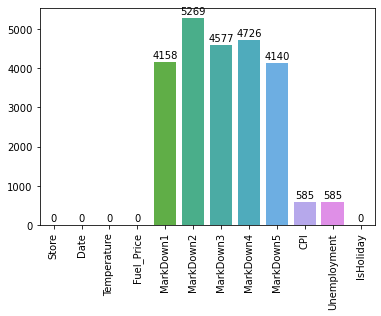

In [38]:
# The first argument to the function below contains the x-values (column names), the second argument the y-values (our counts).
# Refer to the syntax and more example here - https://seaborn.pydata.org/generated/seaborn.barplot.html
#x: x-label
sb.barplot(x=missing_index, y=missing_numbers)

# get the current tick locations and labels
plt.xticks(rotation=90)

# Logic to print value on each bar
for i in range (missing_index.shape[0]):
    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    plt.text(x= i, y= missing_numbers[i]+300, s= missing_numbers[i], ha = 'center', va = 'top')

## Counting Using countplot (Univariate method)

**Using melt with no arguments at all will unpicot the whole data into only two columns (variables, values)**

In [110]:
df = sales_data.melt()
df

,variable,value
0,Store,1
1,Store,1
2,Store,1
3,Store,1
4,Store,1
...,...,...
98275,IsHoliday,False
98276,IsHoliday,False
98277,IsHoliday,False
98278,IsHoliday,False


**Because the countplot will ignore all NaN and Null values, we will substitute them with a unique string.**

In [111]:
df.fillna("Missing", inplace=True)
df.shape

(98280, 2)

**We will pick only the rows that contains the values "Missing" to count.**

In [112]:
df = df.loc[df['value'] == "Missing"]
df

,variable,value
32760,MarkDown1,Missing
32761,MarkDown1,Missing
32762,MarkDown1,Missing
32763,MarkDown1,Missing
32764,MarkDown1,Missing
...,...,...
90085,Unemployment,Missing
90086,Unemployment,Missing
90087,Unemployment,Missing
90088,Unemployment,Missing


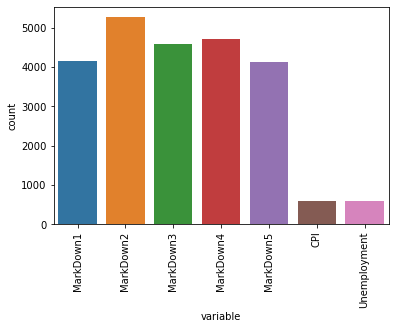

In [113]:
sb.countplot(data=df, x="variable")
plt.xticks(rotation=90);